In [45]:
import pandas as pd
import numpy as np
import missingno as msno 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import re
import string
import nltk
from nltk.tokenize import word_tokenize,RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer 

In [46]:
# Read the dataset csv files and create pandas datframes

train_df=pd.read_csv("data/train.csv")
test_df=pd.read_csv("data/test.csv")
print("Train and Test data sets are imported successfully")

Train and Test data sets are imported successfully


## 1. Data Analysis and Exploration

In [47]:
# Define a function to explore the train and test dataframes

def explore_data(df):
    print("-"*100)
    print("Shape of dataframe: ",df.shape)
    print("Number of records in data set",df.shape[0])
    print("Information of Dataset")
    df.info()
    print("-"*100)
    print("First 5 records of dataset:")
    return df.head(10)
    print("-"*100)


In [48]:
explore_data(train_df)

----------------------------------------------------------------------------------------------------
Shape of dataframe:  (7613, 5)
Number of records in data set 7613
Information of Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
----------------------------------------------------------------------------------------------------
First 5 records of dataset:


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [49]:
explore_data(test_df)

----------------------------------------------------------------------------------------------------
Shape of dataframe:  (3263, 4)
Number of records in data set 3263
Information of Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
----------------------------------------------------------------------------------------------------
First 5 records of dataset:


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


In [50]:
#Calculate count and percentage of missing values in the dataframe

def missing_values(df):
    print("Number of records with missing location: ",df.location.isnull().sum())
    print("Number of records with missing keywords: ",df.keyword.isnull().sum())
    print("-"*100)
    print("{}% of location values are missing ".format(round((df.location.isnull().sum())/ (df.shape[0]) * 100),2))
    print("{}% of keyword values are missing".format(round((df.keyword.isnull().sum())/(df.shape[0]) *100 ),2))
    msno.matrix(df)

Number of records with missing location:  2533
Number of records with missing keywords:  61
----------------------------------------------------------------------------------------------------
33.0% of location values are missing 
1.0% of keyword values are missing


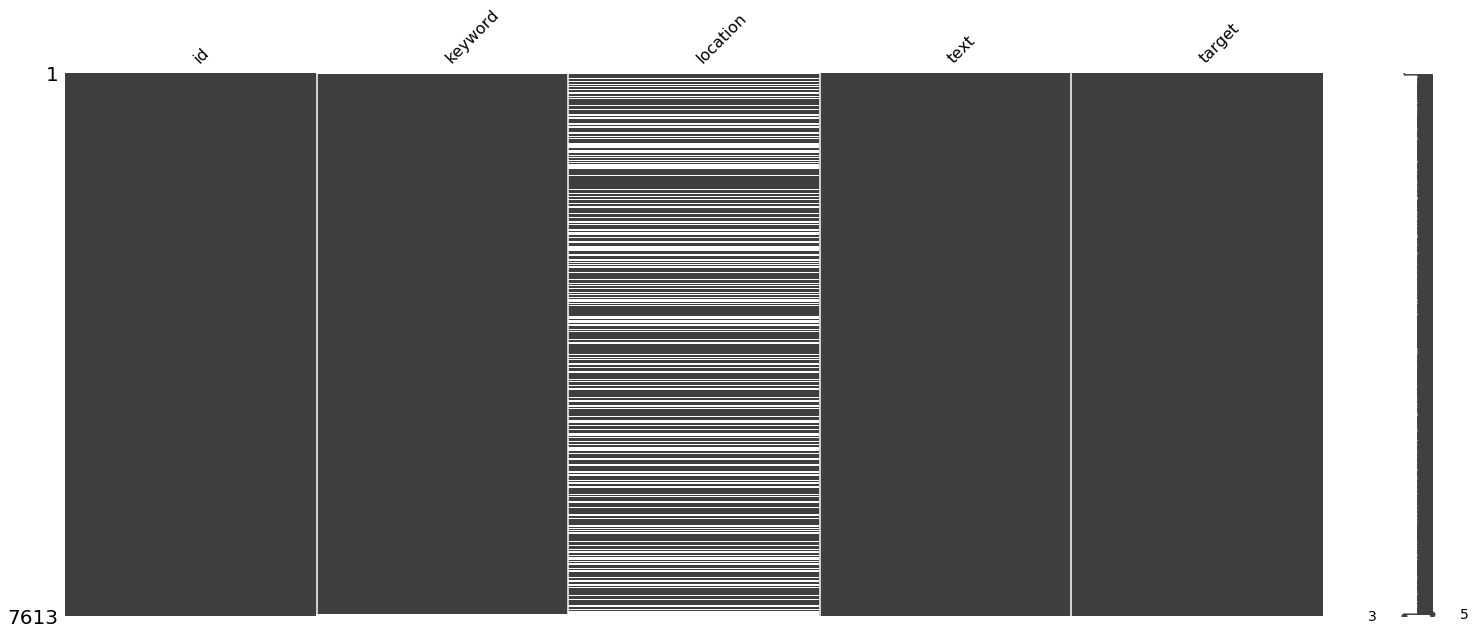

In [51]:
missing_values(train_df)

Number of records with missing location:  1105
Number of records with missing keywords:  26
----------------------------------------------------------------------------------------------------
34.0% of location values are missing 
1.0% of keyword values are missing


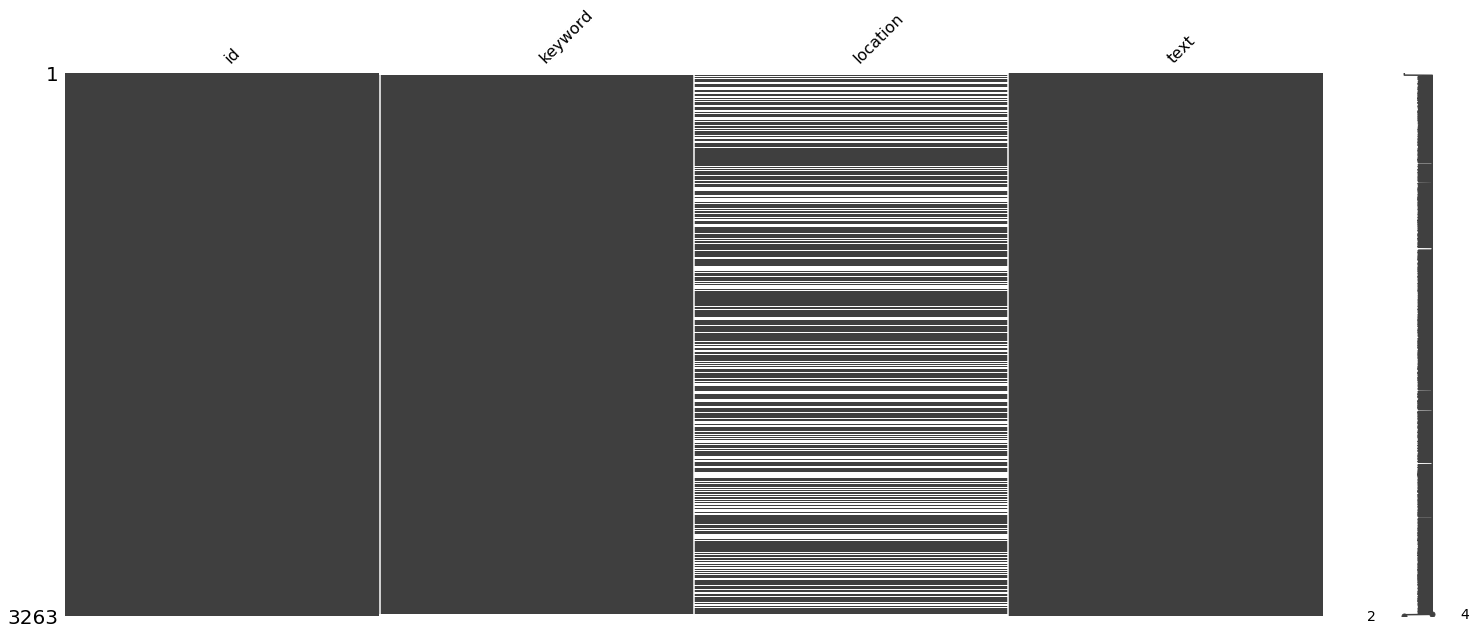

In [52]:
missing_values(test_df)

In [53]:
#let visulaize dataframe features useing dataframe

def feature_viz(df,feature):
    
    if feature == 'target':
        sns.countplot(feature, data=df)
        temp1 = df[feature].value_counts()[0]
        temp2 = len(df[feature])
        temp3 = (temp1/temp2)*100

        temp4 = df[feature].value_counts()[1]
        temp5 = (temp4/temp2)*100
        print('Target of 0 is {} % of total'.format(round(temp3)))
        print('Target of 1 is {} % of total'.format(round(temp5)))
    
    else:
        feat = df[feature].value_counts()
        print(feat.head())
        fig = px.scatter(feat,x=feat.values, y=feat.index, size=feat.values)
        fig.show()
        
        
    

Target of 0 is 57.0 % of total
Target of 1 is 43.0 % of total


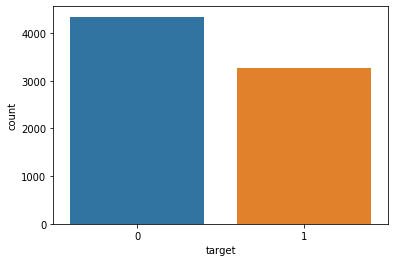

In [54]:
feature_viz(train_df,'target')

In [55]:
feature_viz(train_df,'keyword')

fatalities    45
deluge        42
armageddon    42
harm          41
sinking       41
Name: keyword, dtype: int64


In [56]:
feature_viz(train_df,'location')

USA              104
New York          71
United States     50
London            45
Canada            29
Name: location, dtype: int64


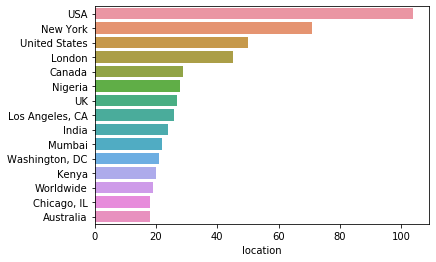

In [57]:
#This Visulization Will Show Top 15 Place Of Tweet
sns.barplot(y=train_df['location'].value_counts()[:15].index,x=train_df['location'].value_counts()[:15],orient='h')

In [58]:
train_df['text_length'] = train_df['text'].apply(lambda x: len(x))
train_df['word_count'] = train_df['text'].str.split().map(lambda x: len(x))
train_df.head(10)

,id,keyword,location,text,target,text_length,word_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,110,18
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,95,14
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,59,15
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,79,12
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,52,10


In [59]:
train_df.text_length.describe()

count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: text_length, dtype: float64

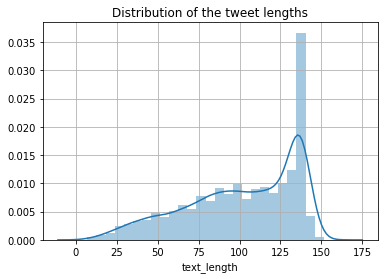

In [60]:
sns.distplot(train_df['text_length']).set_title('Distribution of the tweet lengths')
plt.grid(True)

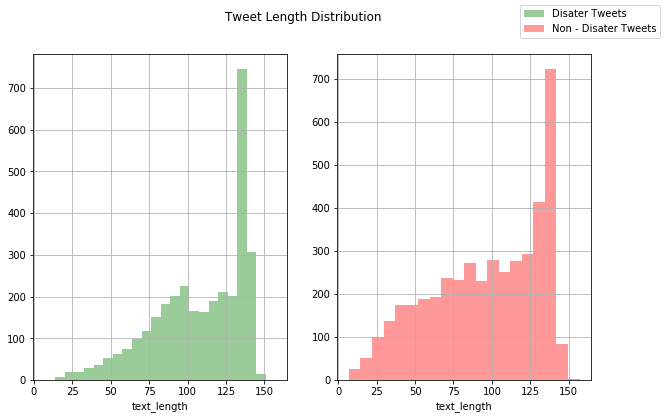

In [61]:
f, (ax1, ax2) = plt.subplots(1,2, sharex=True,figsize=(10,6))
sns.distplot(train_df[(train_df['target'] == 1)]['text_length'], ax=ax1, kde=False, color='green',label='Disater Tweets')
sns.distplot(train_df[(train_df['target'] == 0)]['text_length'], ax = ax2, kde=False, color = 'red', label ='Non - Disater Tweets')
f.suptitle('Tweet Length Distribution')
f.legend()
ax1.grid()
ax2.grid()
plt.show()

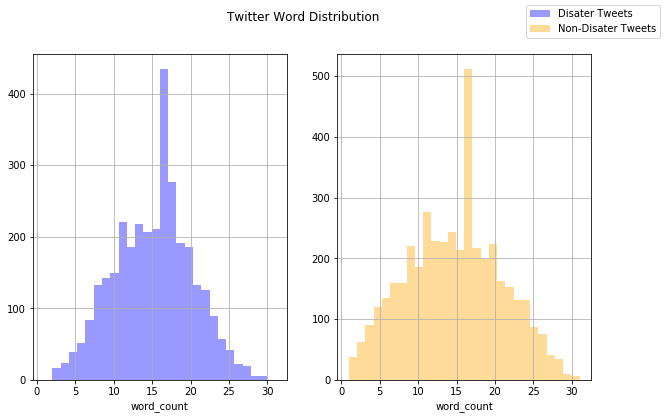

In [62]:
f, (ax1,ax2) = plt.subplots(1,2, sharex=True, figsize=(10,6))
sns.distplot(train_df[(train_df['target'] == 1)]['word_count'],ax=ax1, kde=False,color="blue",label='Disater Tweets')
sns.distplot(train_df[(train_df['target'] == 0)]['word_count'],ax=ax2, kde=False,color="orange",label='Non-Disater Tweets')
f.suptitle('Twitter Word Distribution')
f.legend()
ax1.grid()
ax2.grid()
plt.show()

In [63]:
train_df[train_df['target']==1]['text'][10:20]

10          Three people died from the heat wave so far
11    Haha South Tampa is getting flooded hah- WAIT ...
12    #raining #flooding #Florida #TampaBay #Tampa 1...
13              #Flood in Bago Myanmar #We arrived Bago
14    Damage to school bus on 80 in multi car crash ...
31    @bbcmtd Wholesale Markets ablaze http://t.co/l...
33    #AFRICANBAZE: Breaking news:Nigeria flag set a...
37    INEC Office in Abia Set Ablaze - http://t.co/3...
38    Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...
46    How the West was burned: Thousands of wildfire...
Name: text, dtype: object

In [64]:
train_df[train_df['target']==0]['text'][10:20]

25                       No way...I can't eat that shit
26                                Was in NYC last week!
27                                   Love my girlfriend
28                                            Cooool :)
29                                   Do you like pasta?
30                                             The end!
32    We always try to bring the heavy. #metal #RT h...
34                   Crying out for more! Set me ablaze
35    On plus side LOOK AT THE SKY LAST NIGHT IT WAS...
36    @PhDSquares #mufc they've built so much hype a...
Name: text, dtype: object

In [65]:
train_df['text'][:5]

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

## 2. Data Pre-processing

In [66]:
def clean_text(text):
    
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [67]:
train_df1=train_df.copy()
test_df1=test_df.copy()
train_df1.head(10)
train_df1['text'] = train_df1['text'].apply(lambda x: clean_text(x))
test_df1['text'] = test_df1['text'].apply(lambda x: clean_text(x))



In [68]:
train_df1['text'][:10]
test_df1['text'][:10]

0                   just happened a terrible car crash
1    heard about earthquake is different cities sta...
2    there is a forest fire at spot pond geese are ...
3                apocalypse lighting spokane wildfires
4          typhoon soudelor kills  in china and taiwan
5                        were shakingits an earthquake
6    theyd probably still show more life than arsen...
7                                      hey how are you
8                                      what a nice hat
9                                             fuck off
Name: text, dtype: object

In [69]:
def text_after_preprocess(before_text,after_text):
    print("-"*50)
    print("Before Clean Text")
    print("-"*50)
    print(before_text.head(10))
    print("-"*50)
    print("After Clean Text")
    print("-"*50)
    print(after_text.head(10))
    

In [70]:
text_after_preprocess(test_df['text'],test_df1['text'])

--------------------------------------------------
Before Clean Text
--------------------------------------------------
0                   Just happened a terrible car crash
1    Heard about #earthquake is different cities, s...
2    there is a forest fire at spot pond, geese are...
3             Apocalypse lighting. #Spokane #wildfires
4        Typhoon Soudelor kills 28 in China and Taiwan
5                   We're shaking...It's an earthquake
6    They'd probably still show more life than Arse...
7                                    Hey! How are you?
8                                     What a nice hat?
9                                            Fuck off!
Name: text, dtype: object
--------------------------------------------------
After Clean Text
--------------------------------------------------
0                   just happened a terrible car crash
1    heard about earthquake is different cities sta...
2    there is a forest fire at spot pond geese are ...
3                apo

In [71]:
text_after_preprocess(train_df['text'],train_df1['text'])

--------------------------------------------------
Before Clean Text
--------------------------------------------------
0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
5    #RockyFire Update => California Hwy. 20 closed...
6    #flood #disaster Heavy rain causes flash flood...
7    I'm on top of the hill and I can see a fire in...
8    There's an emergency evacuation happening now ...
9    I'm afraid that the tornado is coming to our a...
Name: text, dtype: object
--------------------------------------------------
After Clean Text
--------------------------------------------------
0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3     people receive

In [73]:
# Lets Tokenize the training and the test dataset copies with RegEx tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
train_df1['text'] = train_df1['text'].apply(lambda x: tokenizer.tokenize(x))
test_df1['text'] = test_df1['text'].apply(lambda x: tokenizer.tokenize(x))

train_df1['text'].head(5)



0    [our, deeds, are, the, reason, of, this, earth...
1        [forest, fire, near, la, ronge, sask, canada]
2    [all, residents, asked, to, shelter, in, place...
3    [people, receive, wildfires, evacuation, order...
4    [just, got, sent, this, photo, from, ruby, ala...
Name: text, dtype: object

In [74]:
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words

In [75]:
train_df1['text'] = train_df1['text'].apply(lambda x: remove_stopwords(x))
test_df1['text'] = test_df1['text'].apply(lambda x: remove_stopwords(x))
train_df1['text'].head(5)

0    [deeds, reason, earthquake, may, allah, forgiv...
1        [forest, fire, near, la, ronge, sask, canada]
2    [residents, asked, shelter, place, notified, o...
3    [people, receive, wildfires, evacuation, order...
4    [got, sent, photo, ruby, alaska, smoke, wildfi...
Name: text, dtype: object

In [76]:
test_df1['text'].head(5)

0                     [happened, terrible, car, crash]
1    [heard, earthquake, different, cities, stay, s...
2    [forest, fire, spot, pond, geese, fleeing, acr...
3           [apocalypse, lighting, spokane, wildfires]
4            [typhoon, soudelor, kills, china, taiwan]
Name: text, dtype: object

In [77]:
def combine_text(text):
    all_text = ' '.join(text)
    return all_text

In [78]:
train_df1['text'] = train_df1['text'].apply(lambda x: combine_text(x))
test_df1['text'] = test_df1['text'].apply(lambda x: combine_text(x))

In [79]:
train_df1['text'].head(5)


0         deeds reason earthquake may allah forgive us
1                forest fire near la ronge sask canada
2    residents asked shelter place notified officer...
3    people receive wildfires evacuation orders cal...
4    got sent photo ruby alaska smoke wildfires pou...
Name: text, dtype: object

In [80]:
test_df1['text'].head(5)

0                          happened terrible car crash
1    heard earthquake different cities stay safe ev...
2    forest fire spot pond geese fleeing across str...
3                apocalypse lighting spokane wildfires
4                  typhoon soudelor kills china taiwan
Name: text, dtype: object

In [87]:
def stem_lem(text):
    tokenizer = nltk.tokenize.TreebankWordTokenizer()
    tokens = tokenizer.tokenize(text)
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemm_text =  " ".join(lemmatizer.lemmatize(token) for token in tokens)
    return lemm_text


In [88]:
train_df1['text'] = train_df1['text'].apply(lambda x: stem_lem(x))

In [85]:
train_df1['text'].head(10)

0         deeds reason earthquake may allah forgive us
1                forest fire near la ronge sask canada
2    residents asked shelter place notified officer...
3    people receive wildfires evacuation orders cal...
4    got sent photo ruby alaska smoke wildfires pou...
5    rockyfire update california hwy closed directi...
6    flood disaster heavy rain causes flash floodin...
7                           im top hill see fire woods
8    theres emergency evacuation happening building...
9                        im afraid tornado coming area
Name: text, dtype: object

In [90]:
test_df1['text'] = test_df1['text'].apply(lambda x: stem_lem(x))
test_df1['text'].head(10)

0                          happened terrible car crash
1    heard earthquake different city stay safe ever...
2    forest fire spot pond goose fleeing across str...
3                 apocalypse lighting spokane wildfire
4                   typhoon soudelor kill china taiwan
5                                shakingits earthquake
6    theyd probably still show life arsenal yesterd...
7                                                  hey
8                                             nice hat
9                                                 fuck
Name: text, dtype: object

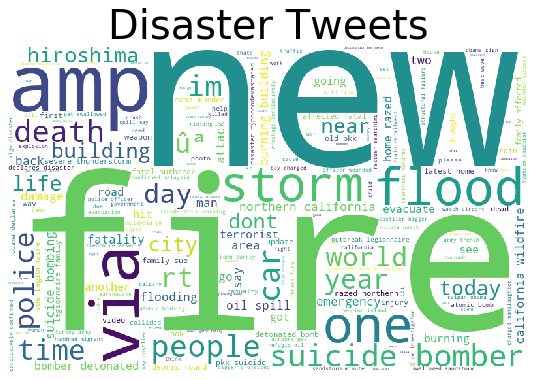

In [131]:
#Lets have a quick look of the tweets in wordcloud
from wordcloud import WordCloud
fig, ax = plt.subplots(figsize=[10, 6])
wordcloud = WordCloud( background_color='white',width=800,height=500).generate(" ".join(train_df1[(train_df1['target'] == 1)]['text']))
ax.imshow(wordcloud)
ax.axis('off')
ax.set_title('Disaster Tweets',fontsize=40);
